# CSE 5520 Homework 6

"Visualization of KDE and Monte Carlo method"

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Oct / 24 (Sun), 11:59PM

This homework is to help you practice with some data visualization fundamentals.
You are expected to use these visualization techniques and others in your final project.
You are required to do this exercise in Python.
All plots/graphs must have titles and x-y coordinate tick labels. 

In [1]:
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports from
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import cluster
from statistics import mean

# Useful imports for visualization
import seaborn
# Other packages
import networkx as nx
import pyvis as pv

EPS = 0.0000001
FINAL = True

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)

# Part 1: Dashboard

## Step 1.

## Step 2. 

## Step 3.

## Step 4.

# Part 2: Monte Carlo Method

## Step 1.

## Step 2. 

## Step 3.

## Step 4.

## Step 1

Focus on LAMP2.
Your plan is to perform six different hypothesis testings (t-test) for this gene
a) Non-Dementia Female vs. Alzheimer’s Female,
b) Non-Dementia Female vs. NonDementia Male,
c) Non-Dementia Female vs. Alzheimer’s Male,
d) Alzheimer’s Female vs NonDementia Male,
e) Alzheimer’s Female vs Alzheimer’s Male,
f) Non-Dementia Male vs
Alzheimer’s Male. Calculate p-values based on t-test for each case.

Discuss what you can say based on the p-values you got,
assuming the significance level $\alpha$ = 0.05. 

In [3]:
gene_key = 'LAMP2'
alpha = 0.05

### Step 1.a. Non-Dementia Female vs. Alzheimer’s Female

### Step 1.b. Non-Dementia Female vs. NonDementia Male

### Step 1.c. Non-Dementia Female vs. Alzheimer’s Male,

### Step 1.d. Alzheimer’s Female vs NonDementia Male

### Step 1.e.  Alzheimer’s Female vs Alzheimer’s Male 

### Step 1.f.  Non-Dementia Male vs Alzheimer’s Male

## Step 2

Produce 2x3 plot of 6 Gardner-Altman estimation plots from Step 1 a) ~f).
The first row should include Gardner-Altman estimation plots of a), b) and c),
and the second row GardnerAltman estimation plots of d), e) and f).

## Step 3

You like to perform Benjamini-Hochberg(BH) correction for the p-values found in Step1

### Step 3 Item (a)

Plot sorted p-values (ascending order) in blue dots. 

### Step 3 Item (b)

Draw a red line with slope $\frac{\alpha}{m}$
on top of the plot a),
where $\alpha$ is the desired FDR (0.05)
and $m$ is total number of comparisons (6).
Your plot should look like the plot give below,
except in your case the range of x axis will be 1 ~ 6 (Note that we have only 6 p-values). 

### Step 3 Item (c)

 Show the largest k that is below the red line. 

### Step 3 Item (d)

Show the corresponding $p$-values up to the largest $k$ found in c).

For example,
the largest $k$ that is smaller than the red line is 4,
4 smallest $p$-values should be recognized. 

### Step 3 Item (e)

Plot the found $p$-values with green dots on top of the plot b).

## Step 4

Add a Jupyter lab markdown cell to compare the Hierarchical clustering results you did for HW4
with what you have produced in Steps 1, 2, and 3.

Do Hierarchical clustering and Gardner-Altman estimation plots show the similar analysis results?
Do Hierarchical clustering and the raw p-values indicate the similar analysis results?
How about the corrected p-values?
Is there any difference between the p-values and corrected p-values
when you contrast these values with the outcome from Hierarchical clustering?

Please note that your goal is trying to build a  case by showing/contrasting both numerical values and plots
(This course tile is “Data Visualization and Communication”!).

### Step 4 Q1: "Do Hierarchical clustering and Gardner-Altman estimation plots show the similar analysis results?"

### Step 4 Q1: "Do Hierarchical clustering and Gardner-Altman estimation plots show the similar analysis results?"

### Step 4 Q2: "Do Hierarchical clustering and the raw p-values indicate the similar analysis results?"

### Step 4 Q3: "How about the corrected p-values?"

### Step 4 Q4: "Is there any difference between the p-values and corrected p-values when you contrast these values with the outcome from Hierarchical clustering?"

## Step 5

Repeat Steps1 ~ 4 for the gene BSN.

## Step 6 (extra credit)

If you think there is a better gene than LAMP2 or BSN
to contrast various plots in the above steps,
you are welcome to repeat the steps with the gene of your choice.

Hint –
You could use your heatmap you generated in HW4
to select what could provide an interesting case
contrasting different plots
(i.e., genes that can differentiate different patient groups).

---

Heatmap from HW4:

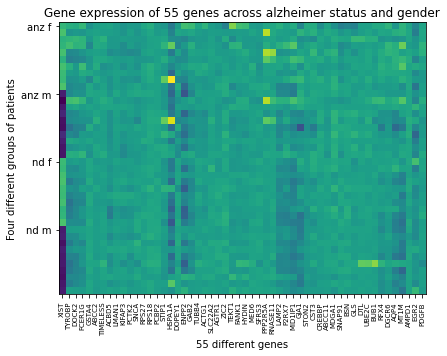



ModuleNotFoundError: No module named 'pyvis'

In [3]:
# use dem_df

dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')

## Step 1

Create and show a 50 x 50 correlation matrix
for pairs of genes for the female Alzheimer’s patients for CR
by appropriately thresholding their Pearson correlation coefficients.

That is, you include top 50 pairs having higher “absolute” correlation coefficient values $|r|$. 

## Step 2

Use Networkx to turn the correlation matrix of Step 1 into a network of undirected edges.

That is, you try to show how top 50 correlated genes could be interacting with each other.

If $r$ is positive, the edge should be red color, and
if negative, green color,
as illustrated in lecture slide.

## Step 3

This time, use Pyvis to repeat what you have done for Step 2.